In [40]:
import torchvision
import torch
import torchvision.transforms as transforms
from torchvision.datasets import VOCDetection
import os
from torch.utils.data import DataLoader

In [49]:
import torch
import torchvision.transforms as transforms

class MyTransform():
    def __init__(self, new_size=(640, 640)):
        self.new_size = new_size
        self.transform = transforms.Compose([
            transforms.Resize(new_size),
            transforms.ToTensor()
        ])

    def __call__(self, img, target):
        old_width, old_height = img.size

        # Get the scaling factors for both width and height
        scale_x = self.new_size[0] / old_width
        scale_y = self.new_size[1] / old_height

        xmin = int(target['annotation']['object'][0]['bndbox']['xmin'])
        xmax = int(target['annotation']['object'][0]['bndbox']['xmax'])
        ymin = int(target['annotation']['object'][0]['bndbox']['ymin'])
        ymax = int(target['annotation']['object'][0]['bndbox']['ymax'])

        # Resize the bounding box coordinates
        xmin *= scale_x
        xmax *= scale_x
        ymin *= scale_y
        ymax *= scale_y

        target = torch.Tensor([xmin, ymin, xmax, ymax])

        return self.transform(img), target

transform = MyTransform()

In [50]:
folder_path = r"C:\Users\xavim\Desktop\Uni\3er\1\Vision\License_plates\Dataset"

In [51]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import VOCDetection


# Initialize dataset
voc_dataset = VOCDetection(root = folder_path,
                           year='2012',
                           image_set='train',  # Use 'val' for validation set
                           download=False,     # Set to True if you want to download the dataset
                           transforms=transform)

# Initialize DataLoader
batch_size = 1 # You can change this value
shuffle = True   # Shuffle the dataset; typically True for training, False for validation

data_loader = DataLoader(voc_dataset, batch_size=batch_size, shuffle=shuffle)

tensor([[ 67.2000, 279.4667, 323.2000, 518.4000]])


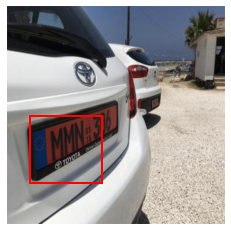

In [52]:
import matplotlib.pyplot as plt
import torch
# Get the first batch
for batch in data_loader:
    images, target = batch

    print(target)

    # Extract the first image and its corresponding bounding box
    first_image = images[0].permute(1, 2, 0).numpy()  # Convert to numpy and rearrange dimensions
    
        # Extract bounding box coordinates
    xmin = target[0][0]
    xmax = target[0][1]
    ymin = target[0][2]
    ymax = target[0][3]
    # Draw the bounding box on the image
    plt.imshow(first_image)
    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, edgecolor='red', linewidth=2))
    # Sow the image with bounding boxes
    plt.axis('off')
    plt.show()
    # Beak after processing the first batch
    break